In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import control
from ipywidgets import interact

ts = np.linspace(0, 10, 1000)

def pzmap_k(kc):
    plt.rcParams['figure.figsize'] = 10,4

    print(kc)
    ax_pzmap = plt.subplot2grid((1, 2), (0, 0))
    ax_resp = plt.subplot2grid((1, 2), (0, 1))

    gLC = control.feedback(kc*Gp,1)
    _, yLC = control.step_response(gLC, ts)

    pLC = gLC.pole()
    cLC = gLC.zero()
    
    
    ax_pzmap.plot(pLA.real, pLA.imag, 'rx',
                  cLA.real, cLA.imag, 'ro',
                  pLC.real, pLC.imag, 'bx',
                  cLC.real, cLC.imag, 'bo')
    ax_pzmap.legend(('p LA', 'c LA', 'p LC','c LC'))
    ax_pzmap.axis(visualizacion_s)
    ax_pzmap.grid()
    ax_resp.plot(ts,yLA,'r',ts,yLC,'b')
    ax_resp.axis(visualizacion_t)
    ax_resp.grid()


def rlocus_int(kc):
    print(kc)
    plt.rcParams['figure.figsize'] = 10,4
    ax_pzmap = plt.subplot2grid((1, 2), (0, 0))
    ax_resp = plt.subplot2grid((1, 2), (0, 1))
    _, y = control.step_response(Gp, ts)

    gLC = control.feedback(kc*Gp,1)
    _, yLC = control.step_response(gLC, ts)

    rlist,klist = control.root_locus(Gp,plot = False);
    
    pLC = gLC.pole()
    cLC = gLC.zero()
    
    
    ax_pzmap.plot(pLA.real, pLA.imag, 'rx',
                  cLA.real, cLA.imag, 'ro',
                  pLC.real, pLC.imag, 'bx',
                  cLC.real, cLC.imag, 'bo',
                  rlist.real, rlist.imag, '-k')
    ax_pzmap.legend(('p LA', 'c LA', 'p LC','c LC','LGDR'))
    ax_pzmap.axis(visualizacion_s)
    ax_pzmap.grid()
    ax_resp.plot(ts,yLA,'r',ts,yLC,'b')
    ax_resp.axis(visualizacion_t)
    ax_resp.grid()


# Lugar Geométrico de las Raíces

Juan Dvid Gallon Hernandez

Simon Uribe 

Para el modelo que se obtuvo mediante la identificación del sistema, donde se tomaron los datos con el objetivo de controlar el flujo 

In [2]:
# Se define la función de transferencia del proceso
Gp = control.tf([0.27], [4.489,1])
Gp

TransferFunction(array([0.27]), array([4.489, 1.   ]))

Varíe $k_c$ y observe cómo varía la posición de los polos del sistema.

In [5]:
visualizacion_s = [-10,10, -5, 5]
visualizacion_t = [0, 20, -2, 2]

pLA = Gp.pole()
cLA = Gp.zero()
_, yLA = control.step_response(Gp, ts)

interact(pzmap_k, 
         kc=(-30., 30.))

interactive(children=(FloatSlider(value=0.0, description='kc', max=30.0, min=-30.0), Output()), _dom_classes=(…

<function __main__.pzmap_k(kc)>

In [6]:
Kc=4.10
# Se define la nueva función de transferencia con el valor de Kc
Gpk = control.tf([Kc], [4.489,1])
Gpk

TransferFunction(array([4.1]), array([4.489, 1.   ]))

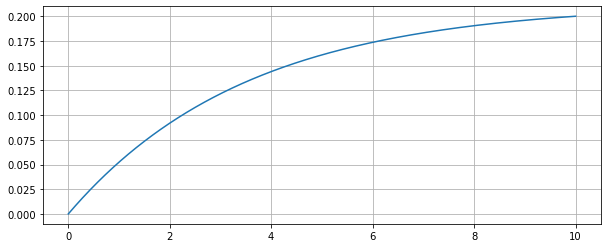

In [7]:
_, yLC1 = control.step_response(control.feedback(Gp,1),ts)
plt.plot(ts,yLC1)
plt.grid()


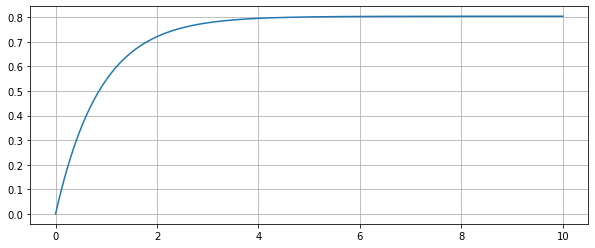

In [8]:
_, yLC = control.step_response(control.feedback(Gpk),ts)
plt.plot(ts,yLC)
plt.grid()


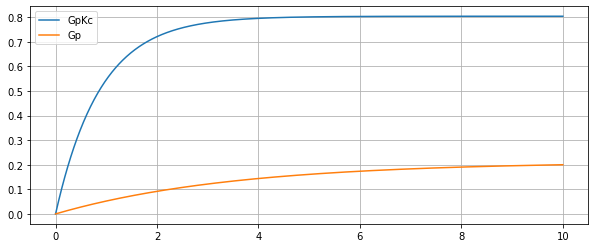

In [9]:
plt.plot(ts,yLC,ts,yLC1)
plt.legend(('GpKc','Gp'))
plt.grid()


Se observa que al aumentar el valor de Kc el sistema se estabiliza mucho más rápido y los polos del sistema se corren mas hacia la izquierda, cada vez más negativos. 

# Comparar con las respuestas experimentales

In [10]:
import pandas as pd 

Primera toma experimental variando k 

In [11]:
a0 = pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\simon1.csv')
a = a0 ##[a0['Tiempo'] > 19 ] 
a

,Tiempo,Referencia,Error,Señal de control,Salida
0,0.0,20,20.015557,20.015557,-0.015557
1,1.0,20,20.015557,20.015557,-0.015557
2,2.0,20,20.012661,20.012661,-0.012661
3,3.0,20,20.014109,20.014109,-0.014109
4,4.0,20,18.723988,18.723988,1.276012
...,...,...,...,...,...
116,116.0,80,64.719443,64.719443,15.280557
117,117.0,80,64.733922,64.733922,15.266078
118,118.0,80,64.744058,64.744058,15.255942
119,119.0,80,64.728130,64.728130,15.271870


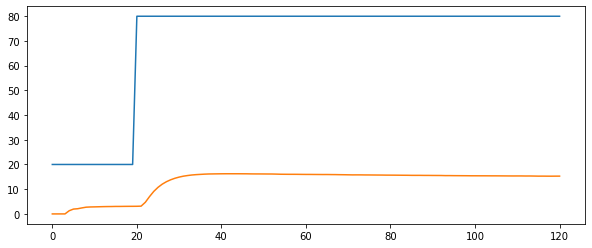

In [12]:
time = a["Tiempo"]
salida = a["Salida"]
escalon = a["Referencia"]

plt.plot(a["Tiempo"],a["Referencia"],  
         a["Tiempo"],1*a["Salida"])  

En la práctica comenzamos a poner valores de K en 1, nuestro sistema arranca en el segundo 20 y se logra estabilizar antes de llegar a el segundo 40 

In [13]:
a1 = pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\Simon2.csv')
a1

,Tiempo,Referencia,Error,Señal de control,Salida
0,0.0,20,20.012661,100.063306,-0.012661
1,1.0,20,20.011213,100.056067,-0.011213
2,2.0,20,19.033849,95.169245,0.966151
3,3.0,20,18.696477,93.482386,1.303523
4,4.0,20,17.936305,89.681525,2.063695
...,...,...,...,...,...
56,56.0,80,61.891602,309.458010,18.108398
57,57.0,80,61.937936,309.689681,18.062064
58,58.0,80,61.978479,309.892394,18.021521
59,59.0,80,62.008886,310.044428,17.991114


segunda toma experimental variando k

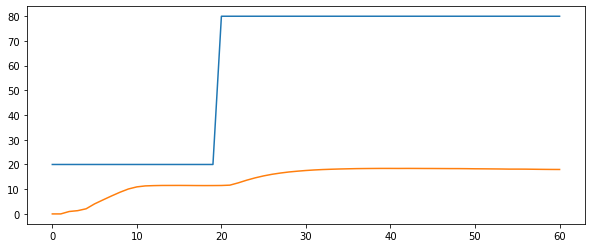

In [14]:
plt.plot(a1["Tiempo"],a1["Referencia"],  
         a1["Tiempo"],1*a1["Salida"])  

In [15]:
a2 = pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\Simon3.csv')
a2

,Tiempo,Referencia,Error,Señal de control,Salida
0,0.0,20,20.011213,200.112133,-0.011213
1,1.0,20,20.014109,200.141092,-0.014109
2,2.0,20,20.014109,200.141092,-0.014109
3,3.0,20,20.019901,200.199010,-0.019901
4,4.0,20,18.699373,186.993732,1.300627
...,...,...,...,...,...
56,56.0,80,62.087075,620.870748,17.912925
57,57.0,80,62.095762,620.957625,17.904238
58,58.0,80,62.118930,621.189296,17.881070
59,59.0,80,62.124721,621.247214,17.875279


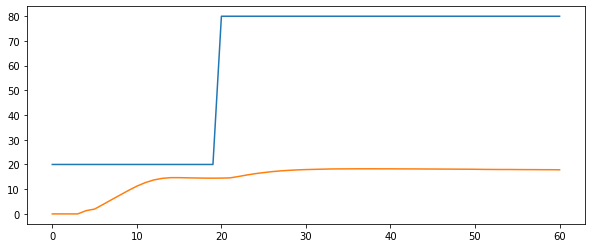

In [16]:
plt.plot(a2["Tiempo"],a2["Referencia"],  
         a2["Tiempo"],1*a2["Salida"])  

# Observación 

En esta práctica vemos que nuestros sistemas mientras más se aumenta el valor de k el sistema se estabiliza más rápido y su comportamiento no cambia ósea no se vuelve inestable, se ve que los polos a medida que se aumenta el K se mueven hacia la izquierda donde son más negativos.

Al compara nuestro modelo obtenido en el laboratorio al cerrar el lazo vemos que se obtiene buenos resultados a la hora de estabilizar el sistema, muy similar a lo que se obtuvo mediante el programa donde se realizó la simulación y vemos como Los polos del sistema en lazo cerrado dependen de qué valor tome 𝑘𝑐
